In [18]:
import pandas as pd

In [19]:
tenis_df = pd.read_csv("dane/gotowe_dane.csv", sep=';')

In [20]:
X = tenis_df.drop(columns=['label'])
y = tenis_df['label']

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
# Import potrzebnych bibliotek
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Inicjalizacja modelu
model = LogisticRegression(max_iter=1000)

# Trenowanie modelu na zbiorze treningowym
model.fit(X_train, y_train)

# Predykcja na danych testowych
y_pred = model.predict(X_test)

# Ocena dokładności
accuracy = accuracy_score(y_test, y_pred)
print(f'Dokładność modelu: {accuracy:.2f}')


Dokładność modelu: 0.96


C:\Users\stani\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
# Predykcja na zbiorze treningowym
y_train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Dokładność na zbiorze treningowym: {train_accuracy:.2f}')
print(f'Dokładność na zbiorze testowym: {accuracy:.2f}')

Dokładność na zbiorze treningowym: 0.96
Dokładność na zbiorze testowym: 0.96


In [24]:
from sklearn.model_selection import cross_val_score

# Walidacja krzyżowa (np. 5-fold)
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print(f'Dokładność walidacji krzyżowej: {cv_scores.mean():.2f} (± {cv_scores.std():.2f})')

C:\Users\stani\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\stani\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stab

Dokładność walidacji krzyżowej: 0.96 (± 0.00)


C:\Users\stani\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
from sklearn.metrics import classification_report, confusion_matrix

# Raport klasyfikacji
print(classification_report(y_test, y_pred))

# Macierz pomyłek
print("Macierz pomyłek:")
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96     11028
           1       0.96      0.96      0.96     10931

    accuracy                           0.96     21959
   macro avg       0.96      0.96      0.96     21959
weighted avg       0.96      0.96      0.96     21959

Macierz pomyłek:
[[10599   429]
 [  404 10527]]


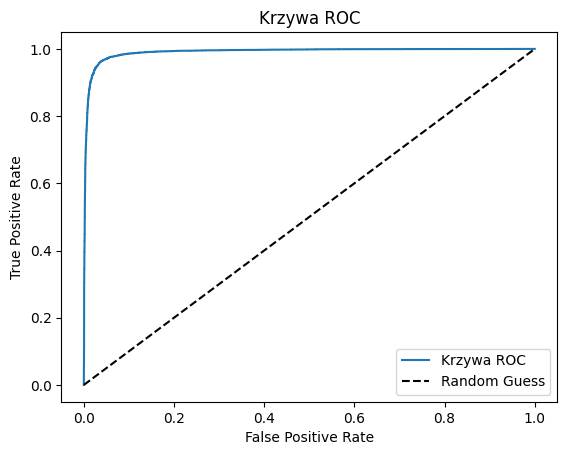

AUC-ROC: 0.99


In [26]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Predykcja prawdopodobieństw
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Obliczenie krzywej ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Wykres krzywej ROC
plt.figure()
plt.plot(fpr, tpr, label='Krzywa ROC')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Krzywa ROC')
plt.legend()
plt.show()

# AUC-ROC
auc = roc_auc_score(y_test, y_pred_proba)
print(f'AUC-ROC: {auc:.2f}')

In [27]:
print(y.value_counts(), 'y._value_counts()')

label
0    36597
1    36597
Name: count, dtype: int64 y._value_counts()


In [28]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
print(f'Dokładność Random Forest: {accuracy_score(y_test, y_pred_rf):.2f}')

Dokładność Random Forest: 1.00


In [29]:
y_train_pred_rf = model_rf.predict(X_train)
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
print(f'Dokładność Random Forest na zbiorze treningowym: {train_accuracy_rf:.2f}')

Dokładność Random Forest na zbiorze treningowym: 1.00


In [30]:
from sklearn.model_selection import cross_val_score

cv_scores_rf = cross_val_score(model_rf, X, y, cv=5, scoring='accuracy')
print(f'Dokładność walidacji krzyżowej (Random Forest): {cv_scores_rf.mean():.2f} (± {cv_scores_rf.std():.2f})')

Dokładność walidacji krzyżowej (Random Forest): 1.00 (± 0.00)
